<a href="https://colab.research.google.com/github/RafsanJany-44/NLP_Research/blob/master/tensoreflow_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade nbformat

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as pyo

df = pd.read_csv("Main_Result.csv")

In [2]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4531,is wondering y Mother Nature is making my life...,0.0
4532,"ouch, thats your achy back...so sorry ... i d...",0.0
4533,One lane stop and go trafffffffic suckssss! Al...,0.0
4534,the dog dug a hole in the backyard well iwas s...,0.0


In [3]:
df["Type"].value_counts()

1.0    2326
0.0    2002
Name: Type, dtype: int64

In [4]:
df.isnull().sum()

Comments     17
Type        208
dtype: int64

In [5]:

df = df.dropna().reset_index(drop=True)

In [6]:
df.isnull().sum()

Comments    0
Type        0
dtype: int64

In [7]:
df

,Comments,Type
0,there is nothing else like khan academy out th...,1.0
1,sal is amazing. so is chemistry. i really real...,1.0
2,thanks khan academy! wish i had this series wh...,1.0
3,this was a really helpful video in understandi...,1.0
4,always stuns me how the study of the minute bl...,1.0
...,...,...
4310,is wondering y Mother Nature is making my life...,0.0
4311,"ouch, thats your achy back...so sorry ... i d...",0.0
4312,One lane stop and go trafffffffic suckssss! Al...,0.0
4313,the dog dug a hole in the backyard well iwas s...,0.0


In [8]:
df = df.sample(frac = 1)
print(df)

                                               Comments  Type
3746          Test discovery just missed being in Py3.1   0.0
409              it is causal relationship...not casual   1.0
2413  oh god this is a life saver. i nearly cried in...   1.0
289                                               great   1.0
280   very very very very much excited for this love...   1.0
...                                                 ...   ...
2572   'organization ...ITIL, forget about people (a...   0.0
3256   i want to comment but don`t understand what y...   0.0
2305  sir can you please post videos on the followin...   0.0
4064  Oww. Can`t even describe how much my back hurt...   0.0
2272  excellently explained. just 2 min into the vid...   1.0

[4315 rows x 2 columns]


In [9]:
df = df.reset_index(drop=True)

In [10]:
df["Type"].value_counts()

1.0    2313
0.0    2002
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

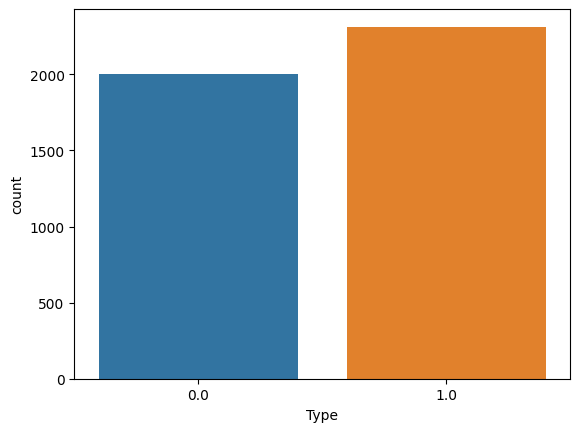

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Type",data=df)

In [12]:

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [13]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [14]:

import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Remove Non-Alphabetic Characters (including numbers)

In [15]:
import re

def convert_to_string(DF):
    DF["Comments"]= DF["Comments"].astype(str)
    
def cleanerFn(b):
    # keeps only words with alphabetic characters in comments
    for row in range(len(b)):
        line = b.loc[row, "Comments"]
        b.loc[row,"Comments"] = re.sub("[^a-zA-Z]", " ", line)

In [16]:
convert_to_string(df)

In [17]:
cleanerFn(df)
df.head()

,Comments,Type
0,Test discovery just missed being in Py,0.0
1,it is causal relationship not casual,1.0
2,oh god this is a life saver i nearly cried in...,1.0
3,great,1.0
4,very very very very much excited for this love...,1.0


In [18]:

sentences = []
labels = []

for i in range(df.shape[0]):
    sentences.append(df['Comments'][i])
    labels.append(df['Type'][i])

In [19]:
training_size = 3600
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [20]:
vocab_size = 10000                                #the maximum number of words to keep
embedding_dim = 16                                #input shape of neuralnetwork
max_length = 200                                  #maximum length of all sequences.
trunc_type='post'                                 # remove values from sequences larger than maxlen
padding_type='post'                               #pad either before or after each sequence.
oov_tok = "<OOV>"                                 #used to replace out-of-vocabulary words during text_to_sequence calls



tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

#Transforms each text in texts to a sequence of integers. -> training data
training_sequences = tokenizer.texts_to_sequences(training_sentences)           

#This function transforms a list  of sequences into a 2D Numpy array of shape -> Training data
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)    


#Transforms each text in texts to a sequence of integers. -> testing data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

#This function transforms a list  of sequences into a 2D Numpy array of shape -> testing data
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)




import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

"""# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)"""



"# loading\nwith open('tokenizer.pickle', 'rb') as handle:\n    tokenizer = pickle.load(handle)"

In [21]:
tokenizer

In [22]:

import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# BERT Model

In [23]:
from transformers import BertTokenizer, TFBertForSequenceClassification
model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
model_bert.summary()


Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [25]:


# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [26]:
num_epochs = 4
history = model_bert.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/4
113/113 - 92s - loss: 0.6896 - accuracy: 0.5311 - val_loss: 0.6923 - val_accuracy: 0.5231 - 92s/epoch - 816ms/step
Epoch 2/4
113/113 - 68s - loss: 0.6858 - accuracy: 0.5336 - val_loss: 0.6559 - val_accuracy: 0.6280 - 68s/epoch - 606ms/step
Epoch 3/4


In [70]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.7386944532394409


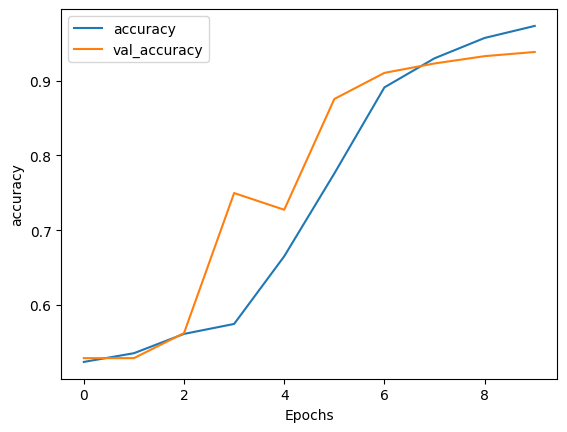

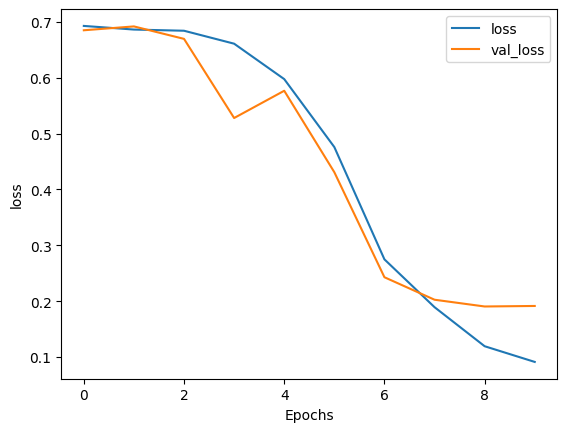

In [71]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Bidirectional LSTM

In [72]:
import keras 
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

bi_lstm_model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
bi_lstm_model.compile(loss='binary_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
# model summary
bi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 204,593
Trainable params: 204,593
Non-trainable params: 0
_________________________________________________________________


In [73]:
num_epochs = 10
history = bi_lstm_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10


113/113 - 6s - loss: 0.5184 - accuracy: 0.7489 - val_loss: 0.2623 - val_accuracy: 0.9063 - 6s/epoch - 54ms/step
Epoch 2/10
113/113 - 3s - loss: 0.1570 - accuracy: 0.9456 - val_loss: 0.1995 - val_accuracy: 0.9203 - 3s/epoch - 25ms/step
Epoch 3/10
113/113 - 3s - loss: 0.0796 - accuracy: 0.9764 - val_loss: 0.2234 - val_accuracy: 0.9147 - 3s/epoch - 26ms/step
Epoch 4/10
113/113 - 3s - loss: 0.0549 - accuracy: 0.9864 - val_loss: 0.1890 - val_accuracy: 0.9371 - 3s/epoch - 25ms/step
Epoch 5/10
113/113 - 3s - loss: 0.0311 - accuracy: 0.9928 - val_loss: 0.1976 - val_accuracy: 0.9357 - 3s/epoch - 25ms/step
Epoch 6/10
113/113 - 3s - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.2264 - val_accuracy: 0.9413 - 3s/epoch - 26ms/step
Epoch 7/10
113/113 - 3s - loss: 0.0130 - accuracy: 0.9978 - val_loss: 0.2126 - val_accuracy: 0.9371 - 3s/epoch - 26ms/step
Epoch 8/10
113/113 - 3s - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.2825 - val_accuracy: 0.9273 - 3s/epoch - 26ms/step
Epoch 9/10
113/113 - 3s - l

In [74]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9639722168445587


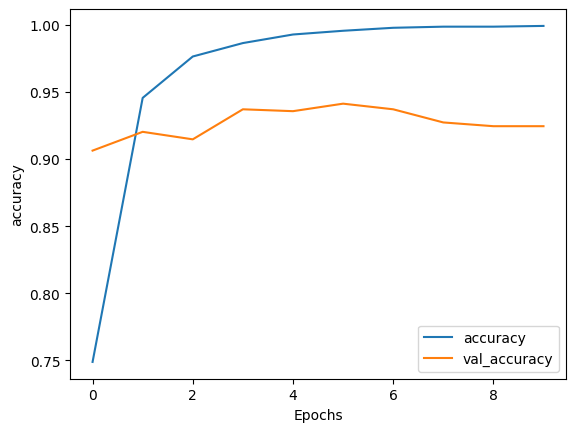

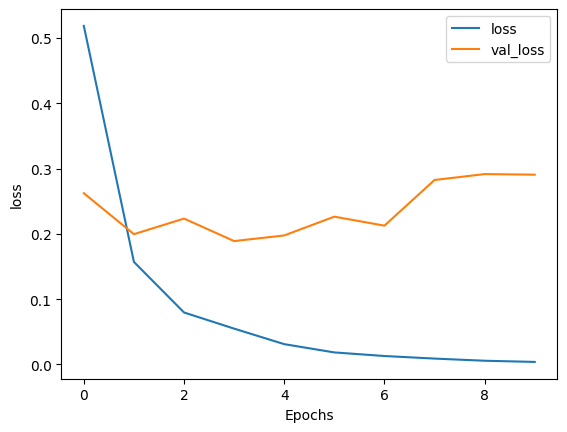

In [75]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Simple ANN

In [76]:

ann_model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(24, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [77]:
ann_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [78]:
num_epochs = 30
history = ann_model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
113/113 - 1s - loss: 0.6906 - accuracy: 0.5331 - val_loss: 0.6895 - val_accuracy: 0.5287 - 1s/epoch - 10ms/step
Epoch 2/30
113/113 - 0s - loss: 0.6845 - accuracy: 0.5375 - val_loss: 0.6779 - val_accuracy: 0.5287 - 373ms/epoch - 3ms/step
Epoch 3/30
113/113 - 0s - loss: 0.6542 - accuracy: 0.6339 - val_loss: 0.6224 - val_accuracy: 0.9021 - 366ms/epoch - 3ms/step
Epoch 4/30
113/113 - 0s - loss: 0.5601 - accuracy: 0.8483 - val_loss: 0.5131 - val_accuracy: 0.8434 - 381ms/epoch - 3ms/step
Epoch 5/30
113/113 - 0s - loss: 0.4310 - accuracy: 0.9008 - val_loss: 0.4050 - val_accuracy: 0.9273 - 402ms/epoch - 4ms/step
Epoch 6/30
113/113 - 0s - loss: 0.3276 - accuracy: 0.9328 - val_loss: 0.3265 - val_accuracy: 0.9259 - 392ms/epoch - 3ms/step
Epoch 7/30
113/113 - 0s - loss: 0.2590 - accuracy: 0.9400 - val_loss: 0.2810 - val_accuracy: 0.9329 - 370ms/epoch - 3ms/step
Epoch 8/30
113/113 - 0s - loss: 0.2138 - accuracy: 0.9514 - val_loss: 0.2488 - val_accuracy: 0.9259 - 389ms/epoch - 3ms/step
Ep

In [79]:
from statistics import mean 
print("Mean Accuracy: ",mean(list(history.history['accuracy'])))

Mean Accuracy:  0.9303240756193797


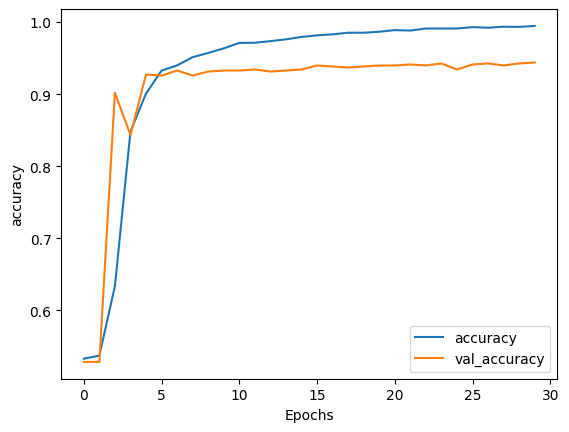

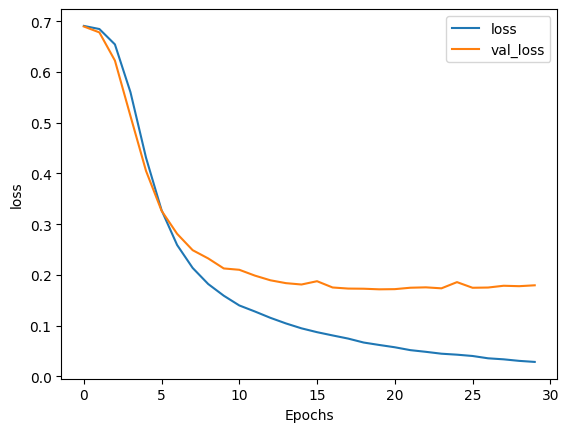

In [80]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [81]:
import keras
ann_model.save("ann.keras")
bi_lstm_model.save("bi_lstm_model.keras")

ann_model = keras.models.load_model("ann.keras")
bi_lstm_model = keras.models.load_model("bi_lstm_model.keras")

In [82]:
sentence = ["This is a very helpfull tutorial", "Very bad playlist and not hlpfull","good vedio","that was bad"," 3456 56345cool 4bro","dude, i was gone","Mindblowing tutorial"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
result1 = ann.predict(padded)
result2 = bi_lstm.predict(padded)



1/1 [==============================] - 0s 415ms/step


In [83]:
result1

array([[0.872165  ],
       [0.9986499 ],
       [0.743858  ],
       [0.7462821 ],
       [0.60328716],
       [0.04701026],
       [0.9034899 ]], dtype=float32)

In [84]:
result2
np.set_printoptions(suppress = True,formatter = {'float_kind':'{:f}'.format})

In [85]:
result2

array([[0.485463],
       [0.999994],
       [0.956827],
       [0.980956],
       [0.839344],
       [0.001243],
       [0.983658]], dtype=float32)

# Evaluation

In [86]:
"""
model_bert
bi_lstm_model
ann_model
"""

'\nmodel_bert\nbi_lstm_model\nann_model\n'

In [96]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn
def conf_mat(y_, y_pred):
  cm = confusion_matrix(y_,y_pred)
  plt.figure(figsize = (8,4))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted',fontsize=14.0, fontweight='bold')
  plt.ylabel('Truth',fontsize=12.0, fontweight='bold')

In [87]:
!pip install scikit-learn

# BERT

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


predictions = model_bert.predict(testing_padded)

y_pred = tf.argmax(predictions.logits, axis=1)

# Evaluate the model
accuracy = accuracy_score(testing_labels, y_pred)
conf_matrix = confusion_matrix(testing_labels, y_pred)
classification_rep = classification_report(testing_labels, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


23/23 [==============================] - 5s 192ms/step
Accuracy: 0.9384615384615385
Confusion Matrix:
[[317  20]
 [ 24 354]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       337
         1.0       0.95      0.94      0.94       378

    accuracy                           0.94       715
   macro avg       0.94      0.94      0.94       715
weighted avg       0.94      0.94      0.94       715



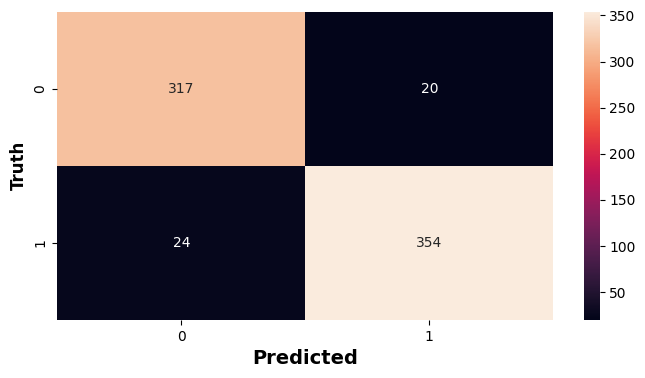

In [98]:
conf_mat(testing_labels,y_pred)

# Bi-LSTM

In [101]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



y_pred = bi_lstm_model.predict(testing_padded)

# Evaluate the model
accuracy = accuracy_score(testing_labels,  y_pred.round())
conf_matrix = confusion_matrix(testing_labels,  y_pred.round())
classification_rep = classification_report(testing_labels,  y_pred.round())

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

23/23 [==============================] - 1s 27ms/step
Accuracy: 0.9244755244755245
Confusion Matrix:
[[307  30]
 [ 24 354]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       337
         1.0       0.92      0.94      0.93       378

    accuracy                           0.92       715
   macro avg       0.92      0.92      0.92       715
weighted avg       0.92      0.92      0.92       715



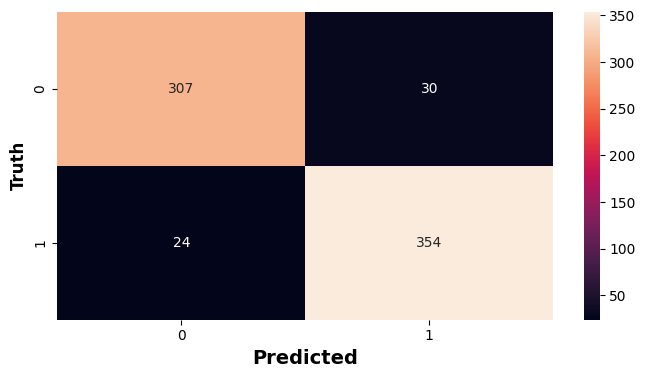

In [102]:
conf_mat(testing_labels,y_pred.round())

# ANN

In [103]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



y_pred = ann_model.predict(testing_padded)

# Evaluate the model
accuracy = accuracy_score(testing_labels, y_pred.round(), normalize=False)
conf_matrix = confusion_matrix(testing_labels, y_pred.round())
classification_rep = classification_report(testing_labels, y_pred.round())

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

 1/23 [>.............................] - ETA: 0s

23/23 [==============================] - 0s 2ms/step
Accuracy: 675
Confusion Matrix:
[[322  15]
 [ 25 353]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       337
         1.0       0.96      0.93      0.95       378

    accuracy                           0.94       715
   macro avg       0.94      0.94      0.94       715
weighted avg       0.94      0.94      0.94       715



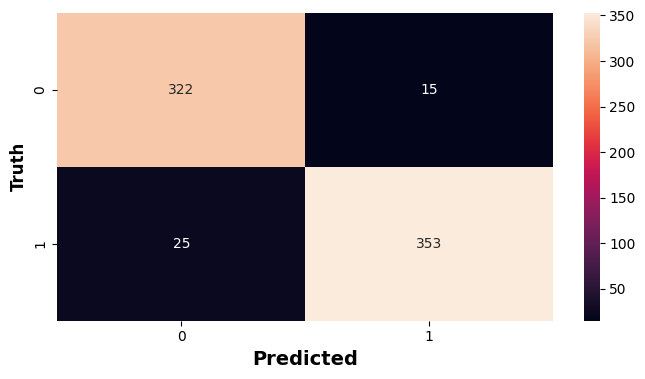

In [104]:
conf_mat(testing_labels,y_pred.round())